CREDIT SCORE CARD MODEL - PROJECT

1. Problem Research

The problem here is that Home Credit (as a company) requires efficiency and speed in receiving application credit from each customer. As a Data Science Intern from Home Credit, we will to process data and create models that are able to predict and assess optimal credit applications and predict credit score customer. To facilitate the predicition, we will create a credit scorecard based on the some models. At the end, we will provide solutions for Home Credit with simulation how our (best) model work to predict credit risk customer.

2. Data Pre-Processing

In [205]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [206]:
data_train = pd.read_csv('D:\Statistics\Rakamin Academy\Data Scientist Home Credit Indonesia\home-credit-default-risk\\application_train.csv')

In [207]:
data_train.shape

(307511, 122)

In [208]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
data_test = pd.read_csv('D:\Statistics\Rakamin Academy\Data Scientist Home Credit Indonesia\home-credit-default-risk\\application_test.csv')

In [210]:
data_test.shape

(48744, 121)

In [211]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [213]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [214]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [215]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


2. Data Preprocessing

In [216]:
data_for_cleaning = data_train

Detect and remove duplicate data

In [217]:
data_for_cleaning.duplicated().sum()

0

Detect null value

In [218]:
count_nv = pd.DataFrame(data_for_cleaning.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(data_for_cleaning) ) * 100
count_nv[count_nv['Percentage'] > 40].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage
48,COMMONAREA_AVG,214865,69.872297
76,COMMONAREA_MEDI,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
84,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
86,FONDKAPREMONT_MODE,210295,68.386172
82,LIVINGAPARTMENTS_MEDI,210199,68.354953
54,LIVINGAPARTMENTS_AVG,210199,68.354953
68,LIVINGAPARTMENTS_MODE,210199,68.354953


Remove columns that have more than 40% null data

In [219]:
data = list(count_nv[count_nv['Percentage'] > 40]['index'])
data_for_cleaning = data_for_cleaning.drop(columns = data)
data_for_cleaning = data_for_cleaning.drop(columns = 'SK_ID_CURR')

In [220]:
count_nv = pd.DataFrame(data_for_cleaning.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(data_for_cleaning) ) * 100
still_null = count_nv[count_nv['Percentage'] != 0].sort_values(by='Percentage', ascending=False)

In [221]:
a = list(still_null['index'])
data_for_cleaning[a].dtypes

for i in a:
    data = data_for_cleaning[i]
    types = str(data.dtype)
    if types == 'object':
        data_for_cleaning[i].fillna(data_for_cleaning[i].mode()[0], inplace=True)
    else:
        data_for_cleaning[i].fillna(data_for_cleaning[i].median(), inplace=True)

In [222]:
count_nv = pd.DataFrame(data_for_cleaning.isnull().sum(), columns=['Total Null Data']).reset_index()
count_nv['Percentage'] = ( count_nv['Total Null Data'] / len(data_for_cleaning) ) * 100
count_nv[count_nv['Percentage'] > 0].sort_values(by='Percentage', ascending=False)

,index,Total Null Data,Percentage


Replace unknown value

In [223]:
data_for_cleaning['CODE_GENDER'] = data_for_cleaning['CODE_GENDER'].replace(['XNA'], data_for_cleaning['CODE_GENDER'].mode()[0])
data_for_cleaning['ORGANIZATION_TYPE'] = data_for_cleaning['ORGANIZATION_TYPE'].replace(['XNA'], data_for_cleaning['ORGANIZATION_TYPE'].mode()[0])

Remove flag document column

In [224]:
FLAG_DOCUMENT = [col for col in data_for_cleaning.columns if 'FLAG_DOCUMENT' in col]
data_for_cleaning.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

In [225]:
data_train_ready = data_for_cleaning

3. Data Visualization and Business Insight

Number of customers applying for credit 

In [226]:
n_apply = data_train.groupby('TARGET')['CODE_GENDER'].count().reset_index()
n_apply.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

n_apply['Customers_pct'] = round(n_apply.Customers / n_apply.Customers.sum(), 2)
n_apply

,TARGET,Customers,Customers_pct
0,0,282686,0.92
1,1,24825,0.08


From the table above, we can see that 92% are able to pay off their loans on time without any problems, and 8% are having trouble. So let's take a closer look at the criteria for whether or not a customer has had trouble paying back a loan. 

Married Status

In [227]:
data_train.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

From table above, there are 6 categories about married status, let`s simplify it into 2 categories only, namely married and unmarried
- married = people who have a partner
- unmarried = people who not have a partner or have had a partner

In [228]:
married_status = []
married = ['Married', 'Civil marriage']

for i in data_train.NAME_FAMILY_STATUS:
    if i in married:
        married_status.append('Married')
    else:
        married_status.append('Unmarried')

data_train['married_status'] = married_status
data_train.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

In [229]:
ms_acc = data_train[data_train['TARGET'] == 0].groupby(['married_status'])['CODE_GENDER'].count().reset_index()
ms_acc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms_acc['Customers_pct'] = round(ms_acc.Customers / ms_acc.Customers.sum(), 2)
ms_acc

,married_status,Customers,Customers_pct
0,Married,208396,0.74
1,Unmarried,74290,0.26


74% from customers who dont have any problems to pay back the credit is married.

In [230]:
ms_nacc = data_train[data_train['TARGET'] == 1].groupby(['married_status'])['CODE_GENDER'].count().reset_index()
ms_nacc.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

ms_nacc['Customers_pct'] = round(ms_nacc.Customers / ms_nacc.Customers.sum(), 2)
ms_nacc

,married_status,Customers,Customers_pct
0,Married,17811,0.72
1,Unmarried,7014,0.28


Customers who have difficulties in paying back the credit, most of them are married customer (72%). So, there's nothing special on married status because the values of both categories are not much different.

Contract Type

In [231]:
contract_type = data_train.groupby(['TARGET', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
contract_type.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
        
name_of_ct = list(contract_type['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in name_of_ct:
    data = contract_type[contract_type['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)
        
contract_type['Percent'] = percentage
contract_type

,TARGET,NAME_CONTRACT_TYPE,Customers,Percent
0,0,Cash loans,255011,0.92
2,1,Cash loans,23221,0.08
1,0,Revolving loans,27675,0.95
3,1,Revolving loans,1604,0.05


From the table above, most of customers prefer cash loans rather than revolving loans yet there's no significant relation between contract type and ability to payback loans.

Occupation Type

In [232]:
occupation_type = data_train.groupby(['TARGET', 'OCCUPATION_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(by=['OCCUPATION_TYPE', 'TARGET'])
occupation_type.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

name_of_ot = list(occupation_type['OCCUPATION_TYPE'].unique())
percentage = []

for i in name_of_ot:
    data = occupation_type[occupation_type['OCCUPATION_TYPE'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

occupation_type['percentage'] = percentage
occupation_type

,TARGET,OCCUPATION_TYPE,Customers,percentage
0,0,Accountants,9339,0.95
18,1,Accountants,474,0.05
1,0,Cleaning staff,4206,0.90
19,1,Cleaning staff,447,0.10
2,0,Cooking staff,5325,0.90
20,1,Cooking staff,621,0.10
3,0,Core staff,25832,0.94
21,1,Core staff,1738,0.06
4,0,Drivers,16496,0.89
22,1,Drivers,2107,0.11


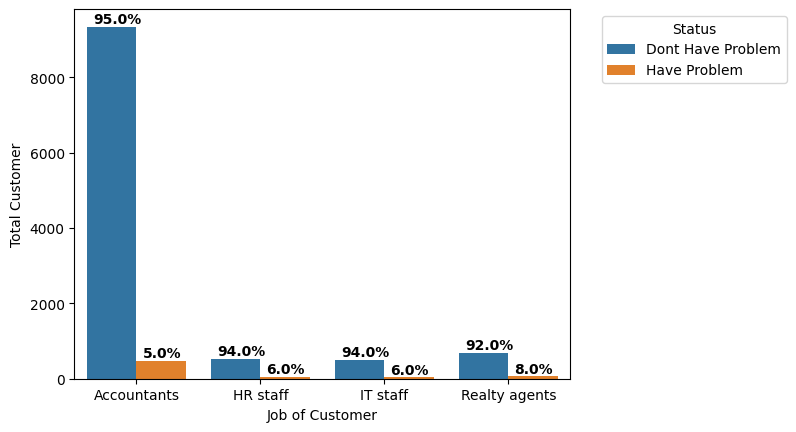

In [233]:
occupation_type_2 = occupation_type[occupation_type['OCCUPATION_TYPE'].isin(['HR staff', 'IT staff', 'Realty agents', 'Accountants'])]
occupation_type_2 = occupation_type_2.reset_index()
occupation_type_2.drop(columns = 'index', inplace=True)

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

occupation_type_2['TARGET'] = occupation_type_2['TARGET'].map(mapping_target)


ax = sns.barplot(x = 'OCCUPATION_TYPE', y= 'Customers', hue= 'TARGET', data = occupation_type_2)
plt.xlabel('Job of Customer')
plt.ylabel('Total Customer')
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(occupation_type_2['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v + 100, s= str(occupation_type_2['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 100, s= str(occupation_type_2['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

From the table and bar chart above, we can see HR staff, IT staff and Realty agents have a high percentage of accepted loan applications (92% - 94%) but the number of customers with these jobs who apply for loans is less than a thousand customers, so it is recommended that we create campaigns for these three jobs.

Age of Customer (derived from birth date)

In [234]:
data_train['Age'] = np.floor(data_train['DAYS_BIRTH'] / -365).astype(int)
data_train.drop(columns= 'DAYS_BIRTH', inplace=True)

In [235]:
age_cat = []
for i in data_train['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

data_train['Age_category'] = age_cat

In [236]:
age_cat = []
for i in data_train['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

data_train['Age_category'] = age_cat

In [237]:
g_age = data_train.groupby(['TARGET', 'Age_category'])['CODE_GENDER'].count().reset_index().sort_values('Age_category').reset_index()
g_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
g_age.drop(columns = 'index', inplace=True)

name_of_ot = list(g_age['Age_category'].unique())
percentage = []

for i in name_of_ot:
    data = g_age[g_age['Age_category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

g_age['percentage'] = percentage

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

g_age['TARGET'] = g_age['TARGET'].map(mapping_target)
g_age

,TARGET,Age_category,Customers,percentage
0,Dont Have Problem,Adult,108678,0.92
1,Have Problem,Adult,9403,0.08
2,Dont Have Problem,Older,91718,0.94
3,Have Problem,Older,5469,0.06
4,Dont Have Problem,Young Adult,82290,0.89
5,Have Problem,Young Adult,9953,0.11


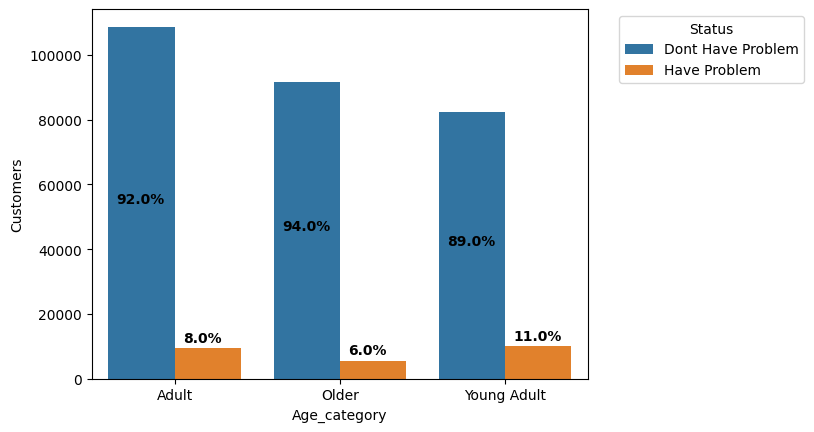

In [238]:
ax = sns.barplot(x = 'Age_category', y= 'Customers', hue= g_age.TARGET, data = g_age)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(g_age['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v/2, s= str(g_age['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 2000, s= str(g_age['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

From the graph before, we can see that Adult (35-50 years old) is the age category that has the largest loan applications with 92% of the loans being paid off without experiencing any problems, so we can target adults to have a loan in Home credit Indonesia.

In [239]:
data_train.drop(columns = 'Age_category', inplace=True)

Income Type of Customers

In [240]:
inc_type = data_train.groupby(['TARGET', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE'])['CODE_GENDER'].count().reset_index().sort_values(['NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']).reset_index()
inc_type.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
inc_type.drop(columns = 'index', inplace=True)

income_type   = list(inc_type['NAME_INCOME_TYPE'].unique())
percentage  = []

for i in income_type:
    data = inc_type[inc_type.NAME_INCOME_TYPE == i]
    contract_type = list(data['NAME_CONTRACT_TYPE'].unique())
    for x in contract_type:
        data2 = data[data.NAME_CONTRACT_TYPE == x]
        total = data2['Customers'].sum()
        for y,z in enumerate(data2['Customers']):
            pct = round(z / total, 2)
            percentage.append(pct)
            
inc_type['percentage'] = percentage
inc_type

,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Businessman,Revolving loans,10,1.00
1,0,Commercial associate,Cash loans,58662,0.92
2,1,Commercial associate,Cash loans,4990,0.08
3,0,Commercial associate,Revolving loans,7595,0.95
4,1,Commercial associate,Revolving loans,370,0.05
5,1,Maternity leave,Cash loans,2,1.00
6,0,Maternity leave,Revolving loans,3,1.00
7,0,Pensioner,Cash loans,49151,0.95
8,1,Pensioner,Cash loans,2842,0.05
9,0,Pensioner,Revolving loans,3229,0.96


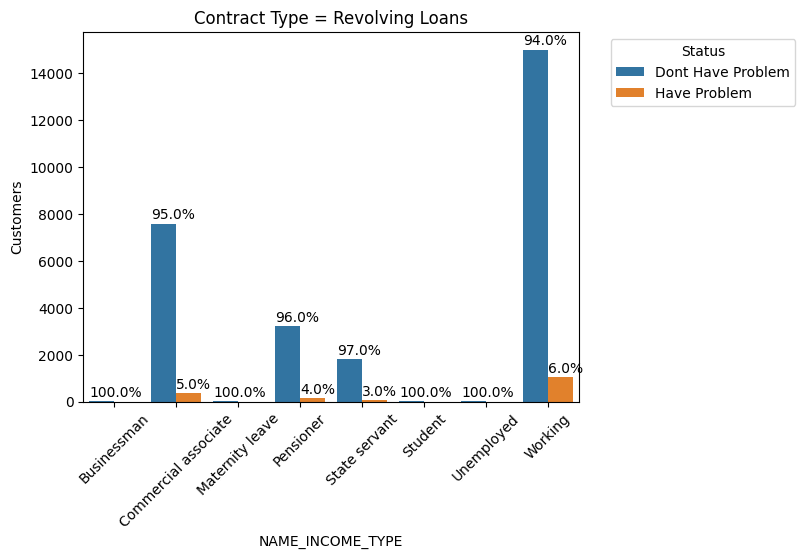

In [241]:
itc_rl = inc_type[inc_type['NAME_CONTRACT_TYPE'] == 'Revolving loans'].reset_index()

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

itc_rl['TARGET'] = itc_rl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_rl, hue = 'TARGET')
plt.title('Contract Type = Revolving Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

i = 0
itc_p = itc_rl.sort_values('TARGET').reset_index()
for p in ax.patches:
    widht, height = p.get_x(), p.get_height()
    if np.isnan(height) == True:
        continue
    else:
        plt.text(widht, height + 200, s = str(itc_p['percentage'][i]* 100) + '%' )
        i = i +1
        
plt.show()

In [242]:
itc_rl

,index,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,0,Dont Have Problem,Businessman,Revolving loans,10,1.00
1,3,Dont Have Problem,Commercial associate,Revolving loans,7595,0.95
2,4,Have Problem,Commercial associate,Revolving loans,370,0.05
3,6,Dont Have Problem,Maternity leave,Revolving loans,3,1.00
4,9,Dont Have Problem,Pensioner,Revolving loans,3229,0.96
5,10,Have Problem,Pensioner,Revolving loans,140,0.04
6,13,Dont Have Problem,State servant,Revolving loans,1806,0.97
7,14,Have Problem,State servant,Revolving loans,61,0.03
8,16,Dont Have Problem,Student,Revolving loans,3,1.00
9,19,Dont Have Problem,Unemployed,Revolving loans,7,1.00


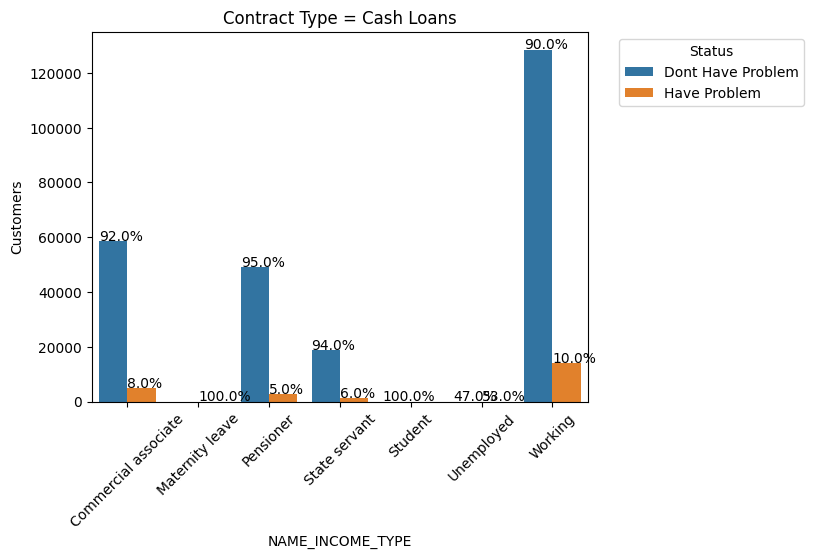

In [243]:
itc_cl = inc_type[inc_type['NAME_CONTRACT_TYPE'] == 'Cash loans'].reset_index()

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

itc_cl['TARGET'] = itc_cl['TARGET'].map(mapping_target)

ax = sns.barplot(x = 'NAME_INCOME_TYPE', y= 'Customers', data = itc_cl, hue = 'TARGET')
plt.title('Contract Type = Cash Loans')
plt.xticks(rotation=45)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

i = 0
itc_p2 = itc_cl.sort_values('TARGET').reset_index()
for p in ax.patches:
    widht, height = p.get_x(), p.get_height()
    if np.isnan(height) == True:
        continue
    else:
        plt.text(widht, height + 200, s = str(itc_p2['percentage'][i]* 100) + '%' )
        i = i +1
        
plt.show()

In [244]:
itc_cl

,index,TARGET,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,Customers,percentage
0,1,Dont Have Problem,Commercial associate,Cash loans,58662,0.92
1,2,Have Problem,Commercial associate,Cash loans,4990,0.08
2,5,Have Problem,Maternity leave,Cash loans,2,1.00
3,7,Dont Have Problem,Pensioner,Cash loans,49151,0.95
4,8,Have Problem,Pensioner,Cash loans,2842,0.05
5,11,Dont Have Problem,State servant,Cash loans,18648,0.94
6,12,Have Problem,State servant,Cash loans,1188,0.06
7,15,Dont Have Problem,Student,Cash loans,15,1.00
8,17,Dont Have Problem,Unemployed,Cash loans,7,0.47
9,18,Have Problem,Unemployed,Cash loans,8,0.53


From graphs and tables above, company can make a campaign for revolving loans and cash loans targetting workers.

4. Feature Engineering

In [245]:
x = data_train_ready.drop(columns = 'TARGET')

Numeric Data Type

In [246]:
num = x.select_dtypes(exclude='object')

In [247]:
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert negative value to positive value

In [248]:
negative_column = num.columns[(num < 0).any()].tolist()
num[negative_column] = num[negative_column] * -1
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,...,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


Look for a numeric data type that has a unique value > 2

In [249]:
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

Check the distribution of data

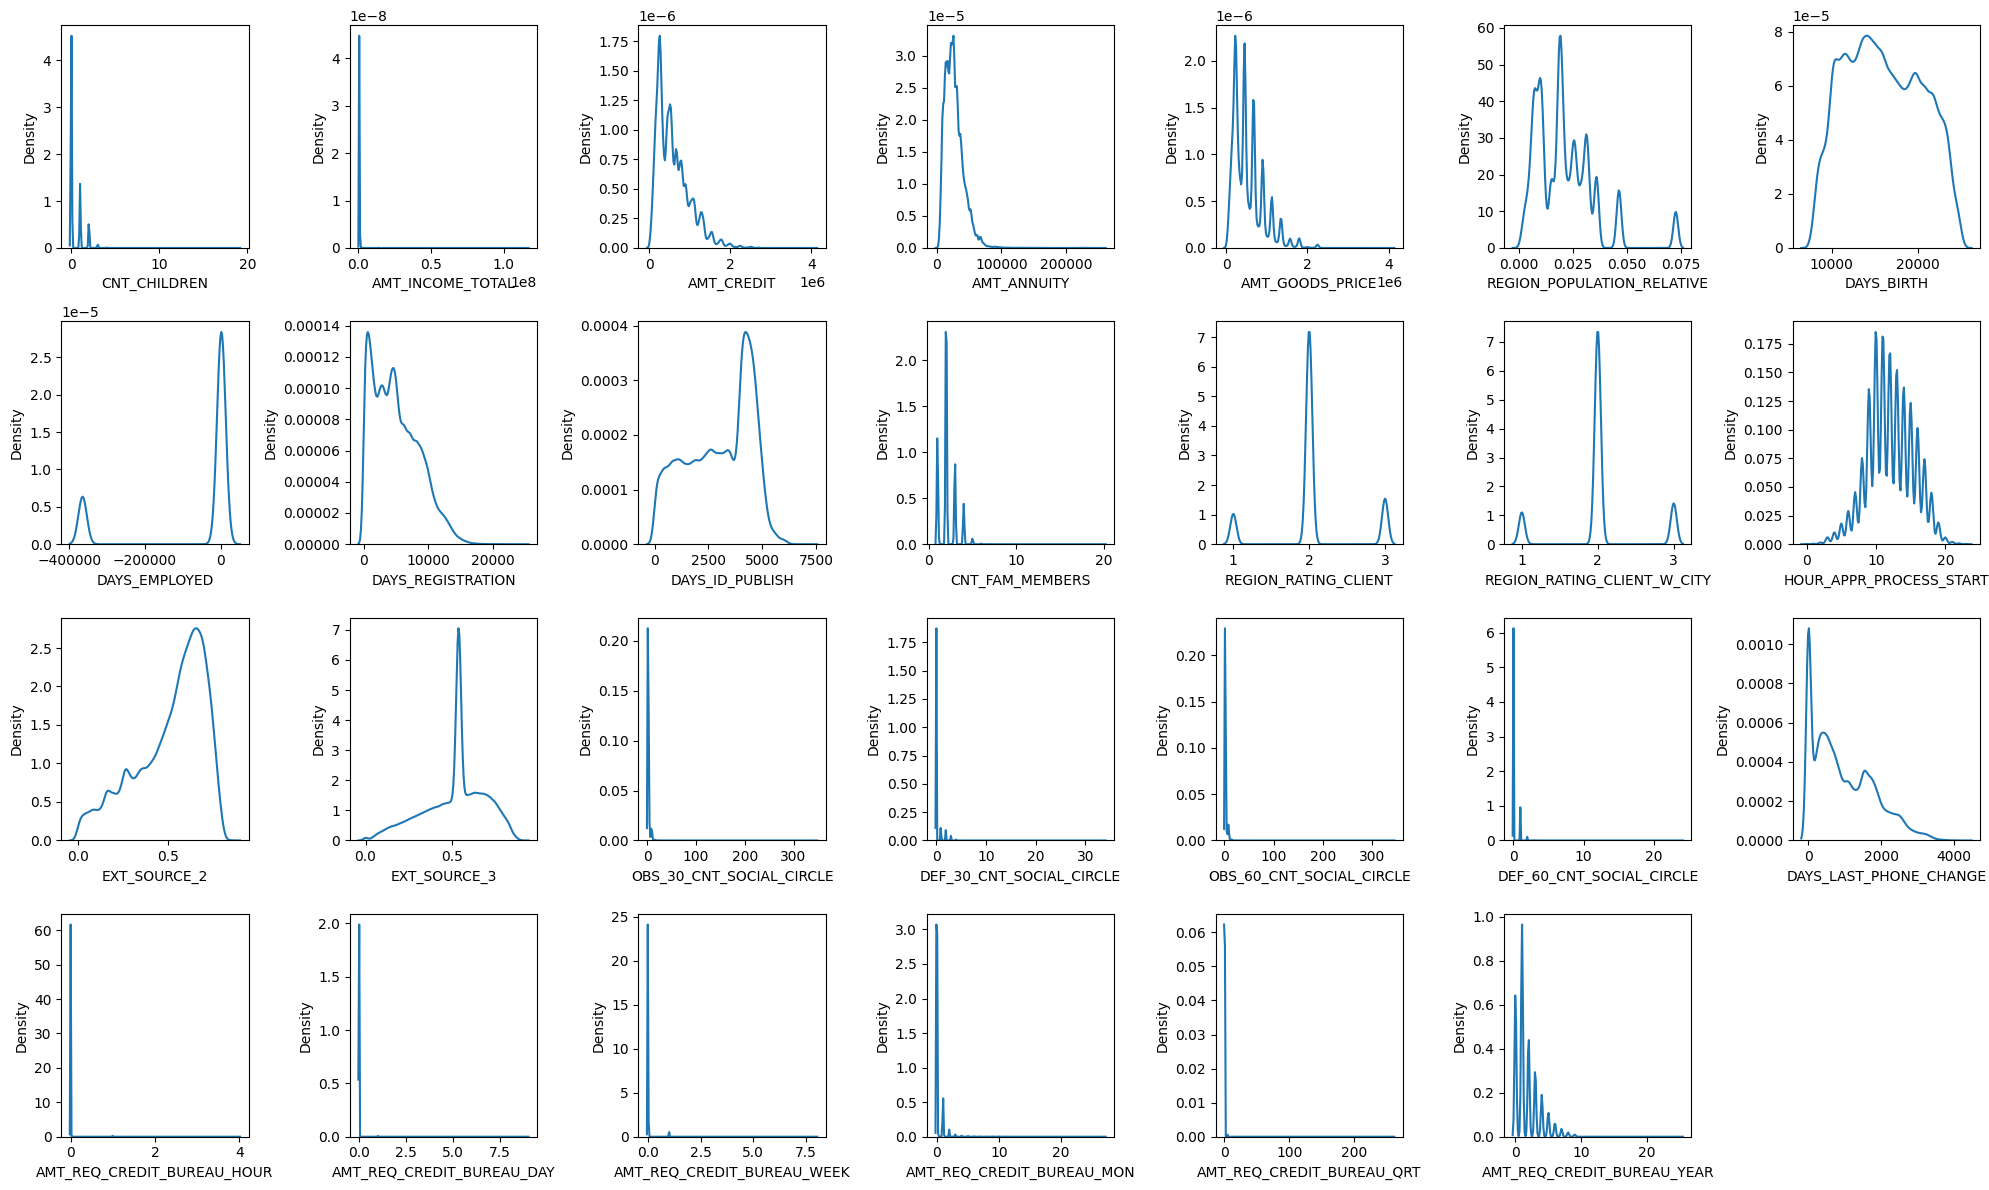

In [250]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

Based on graphs above, the data distribution need to normalized.

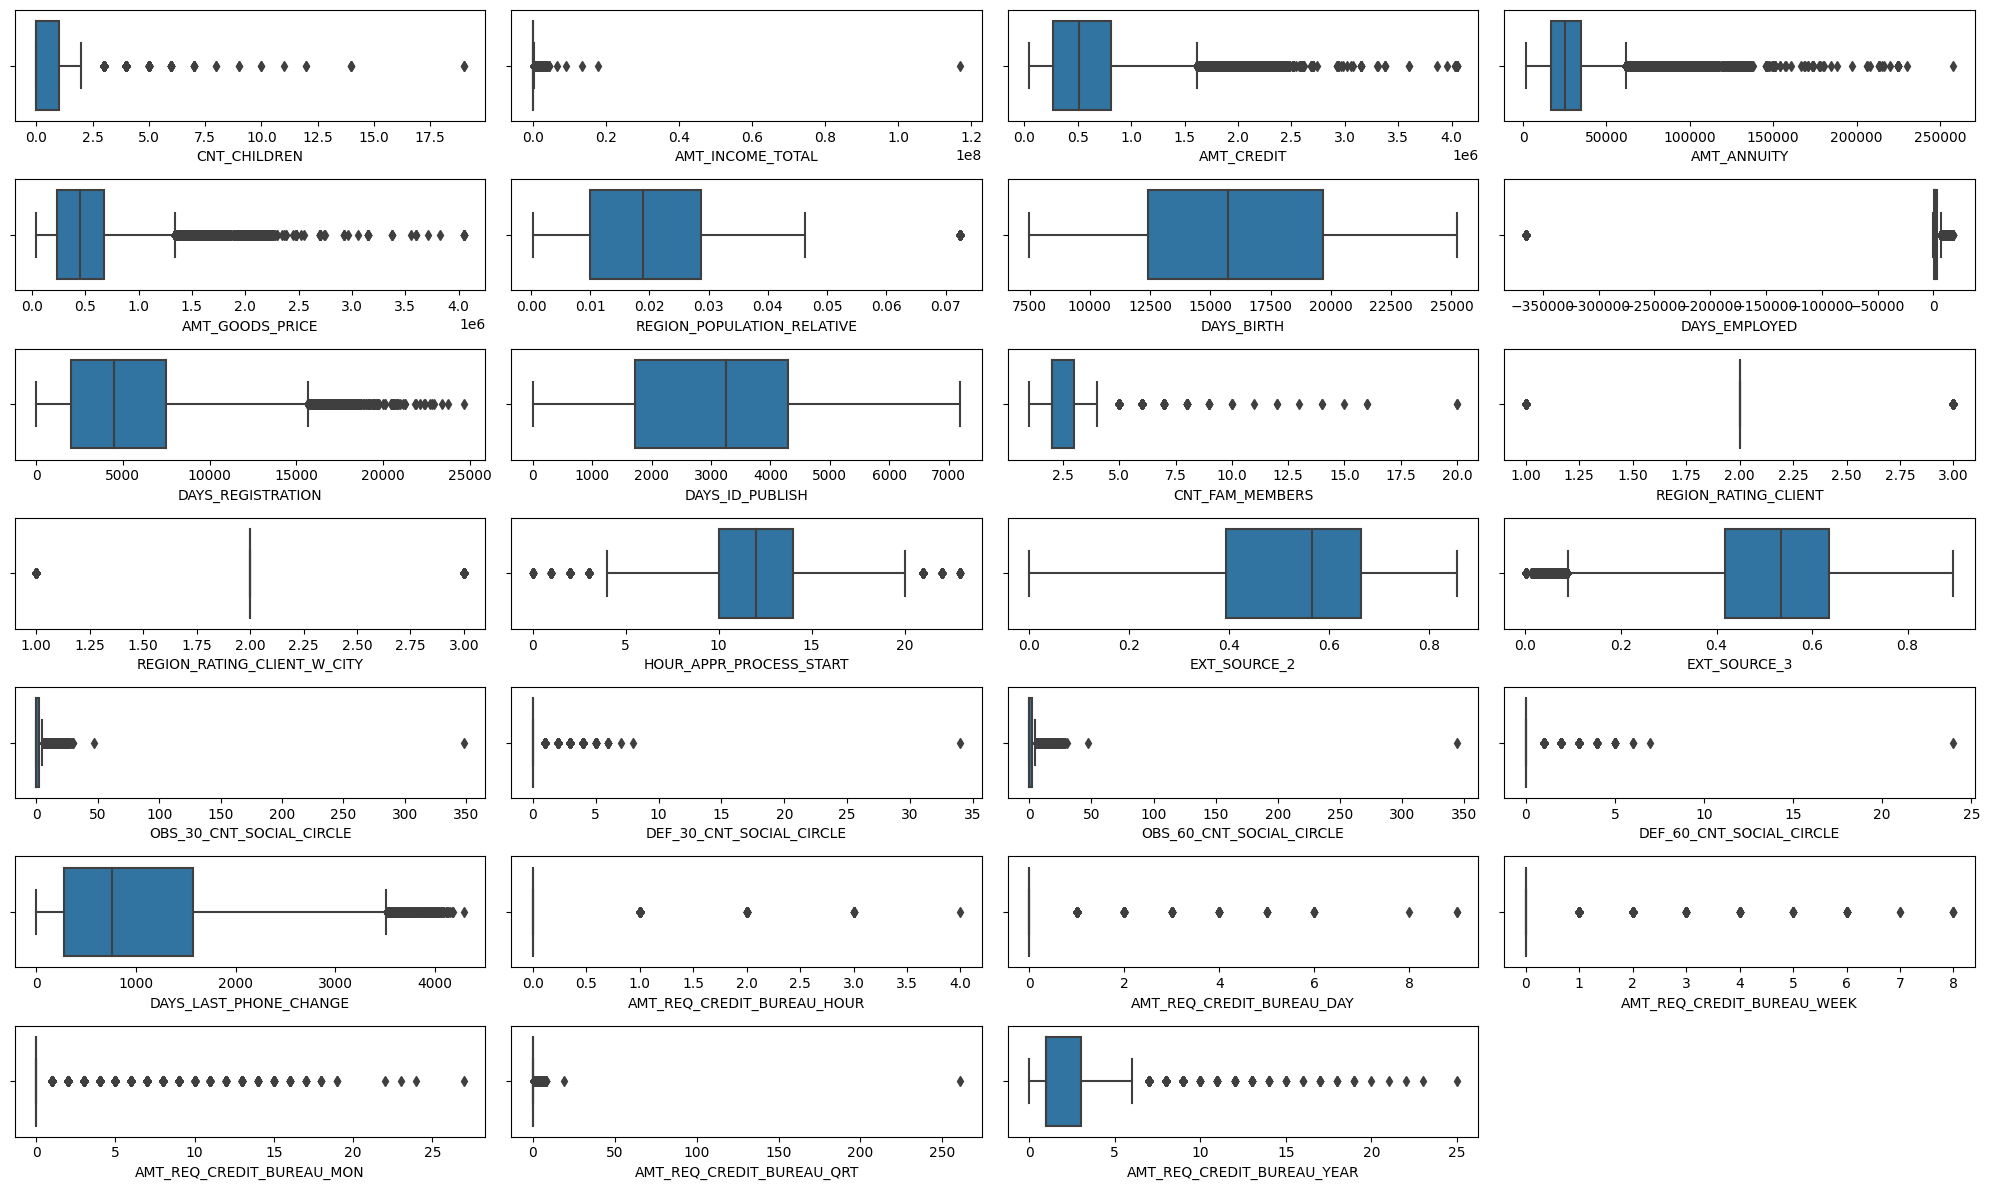

In [251]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

Remove Outlier

In [252]:
print(f'Row before delete outlier at CNT_children :  {len(data_train_ready)}')

filtered_entries = np.array([True] * len(data_train_ready))

zscore = abs(stats.zscore(data_train_ready['CNT_CHILDREN'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data_train_ready = data_train_ready[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Row after delete outlier at CNT_children : {len(data_train_ready)}')

Row before delete outlier at CNT_children :  307511
Row after delete outlier at CNT_children : 303239


Feature Transformation

In [253]:
x = data_train_ready.drop(columns = 'TARGET', axis=1)
num = x[num_a]

In [254]:
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,1.509510,-0.459710,0.385831,0.577304,...,4.164731,0.252564,5.254914,-0.206172,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.158701,-0.463592,1.083617,1.789288,...,-0.320453,-0.168056,-0.275683,0.163731,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.679674,-0.456807,0.212377,0.304955,...,-0.320453,-0.588676,-0.275683,0.179446,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.670310,-0.476632,-1.367137,0.367244,...,-0.320453,0.252564,-0.275683,0.418795,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-0.441070
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.882034,-0.476625,0.197922,-0.309320,...,-0.320453,-0.588676,-0.275683,-0.172324,-0.07111,-0.058754,-0.155798,-0.270044,-0.307919,-1.007106


In [255]:
num_1 = x[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.589198,0.141631,-0.477744,-0.165346,-0.506964,-0.150759,1.509510,-0.459710,0.385831,0.577304,...,0,1,1,0,0,0,0,0,0,0
1,-0.589198,0.424753,1.725509,0.594213,1.600729,-1.253789,-0.158701,-0.463592,1.083617,1.789288,...,0,1,1,0,0,0,0,0,0,0
2,-0.589198,-0.424615,-1.152447,-1.405069,-1.091757,-0.784603,-0.679674,-0.456807,0.212377,0.304955,...,1,1,1,0,0,0,0,0,0,0
3,-0.589198,-0.141492,-0.711048,0.179004,-0.653162,-0.930108,-0.670310,-0.476632,-1.367137,0.367244,...,0,1,0,0,0,0,0,0,0,0
4,-0.589198,-0.198116,-0.213418,-0.361141,-0.068369,0.562091,-0.882034,-0.476625,0.197922,-0.309320,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.589198,-0.047118,-0.855088,0.032003,-0.848093,0.843848,1.540115,-0.456884,-0.976864,0.668749,...,0,1,0,0,0,0,0,0,0,0
307507,-0.589198,-0.405740,-0.818198,-1.042382,-0.848093,0.309175,-1.074572,2.118014,0.176098,-0.728114,...,0,1,1,0,0,0,0,0,0,0
307508,-0.589198,-0.065993,0.195641,0.199205,0.126562,-1.148184,0.252185,-0.511027,-0.489661,-1.430522,...,0,1,0,1,0,0,0,0,1,1
307509,-0.589198,0.009507,-0.568393,-0.475821,-0.592246,-1.125704,0.938518,-0.488940,0.693628,1.365193,...,0,1,0,0,0,0,0,1,1,0


Object Data Type

Feature Transformation

In [256]:
obj = x.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,Business Entity Type 3
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


One hot encoding

In [257]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

Label Encoding

In [258]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])
    
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
df_train = pd.concat([num, obj], axis=1)

In [260]:
data_train_ready = pd.concat([df_train, data_train_ready['TARGET']],axis=1)

Data Splitting

In [261]:
x = data_train_ready.drop(columns = 'TARGET')
y = data_train_ready['TARGET']

Oversampling

In [262]:
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x, y.ravel())

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)

Undersampling

In [264]:
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x, y.ravel())

In [265]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_under, y_under, test_size=0.3, random_state=42)

5. Train Logistic Regression Model

With oversampling data

In [266]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     83391
           1       0.99      0.89      0.94     83915

    accuracy                           0.94    167306
   macro avg       0.95      0.94      0.94    167306
weighted avg       0.95      0.94      0.94    167306



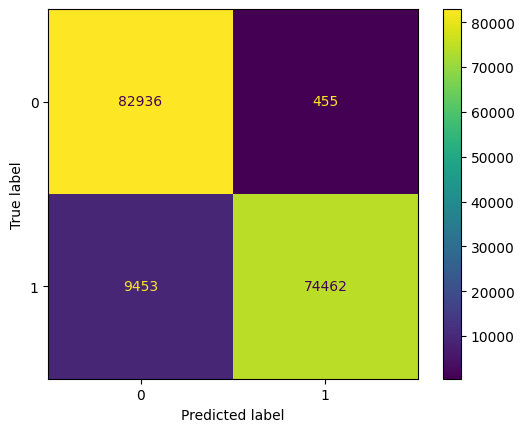

In [267]:
lr1 = LogisticRegression()
lr1.fit(x_train, y_train.ravel())
predictions = lr1.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

With undersampling data

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7289
           1       0.68      0.66      0.67      7349

    accuracy                           0.68     14638
   macro avg       0.68      0.68      0.68     14638
weighted avg       0.68      0.68      0.68     14638



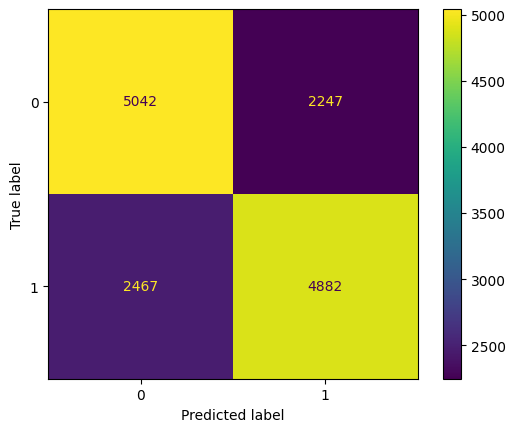

In [268]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)
predictions2 = lr2.predict(x_test2)
  
# print classification report
print(classification_report(y_test2, predictions2))
confusionmatrix(predictions2, y_test2)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     17107
           1       0.68      0.67      0.68     17047

    accuracy                           0.68     34154
   macro avg       0.68      0.68      0.68     34154
weighted avg       0.68      0.68      0.68     34154



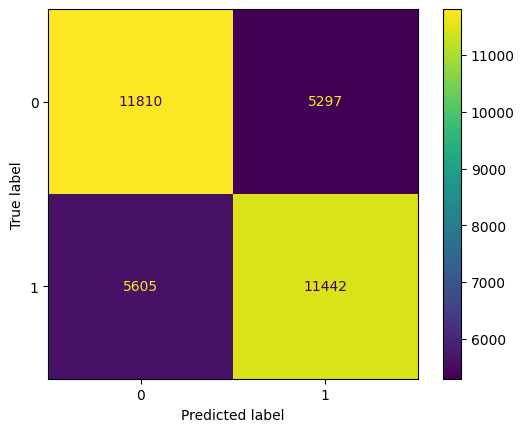

In [269]:
predictions = lr2.predict(x_train2)
  
# print classification report
print(classification_report(y_train2, predictions))
confusionmatrix(predictions, y_train2)

6. Train XGBoost Model

With oversampling data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     83391
           1       1.00      0.91      0.95     83915

    accuracy                           0.95    167306
   macro avg       0.96      0.95      0.95    167306
weighted avg       0.96      0.95      0.95    167306



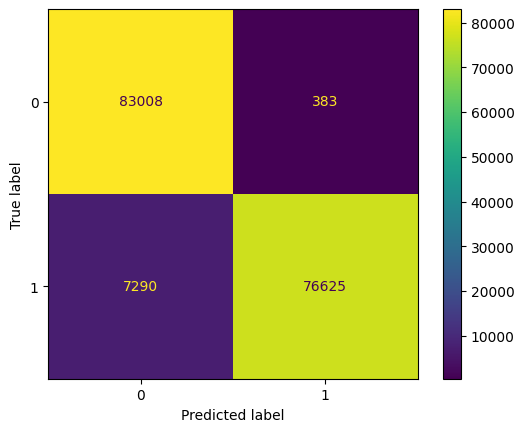

In [270]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train.ravel())

predictions = xgb_model.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    195452
           1       1.00      0.92      0.96    194928

    accuracy                           0.96    390380
   macro avg       0.96      0.96      0.96    390380
weighted avg       0.96      0.96      0.96    390380



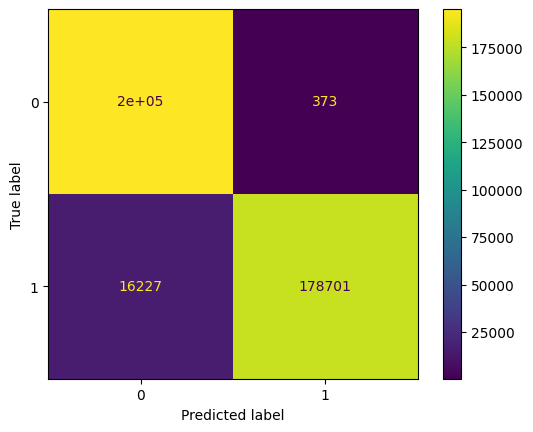

In [271]:
predictions = xgb_model.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

7. Train Random Forest

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     83391
           1       0.99      0.92      0.95     83915

    accuracy                           0.96    167306
   macro avg       0.96      0.96      0.96    167306
weighted avg       0.96      0.96      0.96    167306



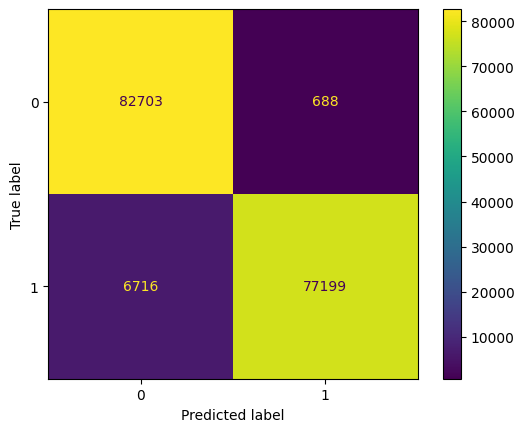

In [272]:
rf_model = RandomForestClassifier().fit(x_train, y_train)
predictions = rf_model.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))
confusionmatrix(predictions, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    195452
           1       1.00      1.00      1.00    194928

    accuracy                           1.00    390380
   macro avg       1.00      1.00      1.00    390380
weighted avg       1.00      1.00      1.00    390380



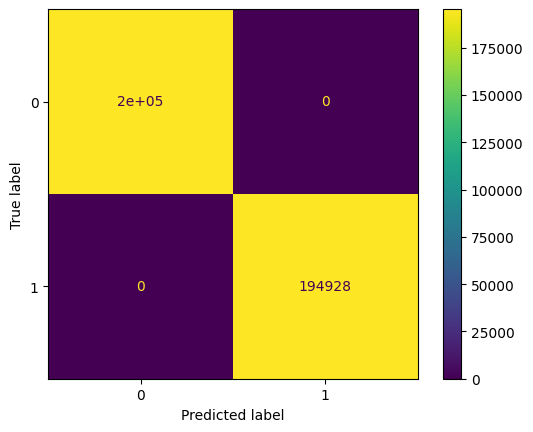

In [273]:
predictions = rf_model.predict(x_train)
  
# print classification report
print(classification_report(y_train, predictions))
confusionmatrix(predictions, y_train)

From those 3 models, Random forest was the best because random forest have a higher accuracy, precision and recall than the others.